<img src="http://www.science.uwaterloo.ca/~odonovan/2018W-phys239/pendulum.png" align=right width=200 border=50>


## Pendula

Consider first the simple pendulum (see figure, left). Newton's second law (N2L) says that the three vectors in the free body diagram (FBD) obey the equation (see figure, right)
$$
    m\ddot{\vec{r}} 
    = m\vec{g} + \vec{F}_\text{T}.
$$

This problem is easiest to solve using polar coordinates, $\{r,\theta\}$, because the length of the position vector of the bob is a constant, $|\vec{r}|=\ell$. 

In terms of the Cartesian basis vectors, the polar basis vectors are rotated by angle $\theta$:
$$
    \begin{bmatrix}
        \hat{\theta} \\ 
        \hat{r}
    \end{bmatrix}
    =
    \begin{bmatrix}
        \cos\theta & -\sin\theta \\ 
        \sin\theta & \cos\theta
    \end{bmatrix}
    \begin{bmatrix}
        \hat{x} \\ 
        \hat{y}
    \end{bmatrix}.
$$
Because $\theta=\theta(t)$ they have time derivatives,
\begin{align*}
    \dot{\hat{\theta}} 
    &= (-\hat{x}\,\sin\theta - \hat{y}\,\cos\theta)\dot{\theta}
    =  -\hat{r}\,\dot{\theta}
\\
    \dot{\hat{r}} 
    &= (\hat{x}\,\cos\theta - \hat{y}\,\sin\theta)\dot{\theta}
    = \hat{\theta}\,\dot{\theta}
\end{align*}
The polar basis vectors are very much **not** time-independent vectors; this is a common source of error.

In the polar basis I have
\begin{align*}
    \vec{r} &= \ell \hat{r}
    \\
    \vec{F}_\text{T} &= -F_\text{T}\hat{r}
    \\
    m\vec{g} &= \hat{y}\,mg 
    = (\hat{r}\,\cos\theta - \hat{\theta}\,\sin\theta) mg,
\end{align*}
and the velocity and acceleration are
\begin{align*}
    \dot{\vec{r}} &= \ell \dot{\hat{r}} = \hat{\theta}\,\dot{\theta}\ell 
    \\
    \ddot{\vec{r}} &= \dot{\hat{\theta}}\,\dot{\theta}\ell 
    + \hat{\theta}\,\ddot{\theta}\ell 
    = - \hat{r}\,\dot{\theta}^2 \ell
    + \hat{\theta}\,\ddot{\theta}\ell.
\end{align*}

N2L in this basis is then
\begin{align*}
    - \hat{r}\,\dot{\theta}^2 m\ell
    + \hat{\theta}\,\ddot{\theta}m\ell
    &=
    (\hat{r}\,\cos\theta - \hat{\theta}\,\sin\theta) mg
    -F_\text{T}\hat{r}
    \\
    \Rightarrow\quad
    -\dot{\theta}^2 m\ell
    &=
    mg\cos\theta -F_\text{T}
    \\
    \&\quad
    \ddot{\theta}m\ell
    &=
    -mg \sin\theta.
\end{align*}

While both equations are valid we only need to worry about the second,
$$
   \ddot{\theta} = -\frac{g}{\ell} \sin\theta,
$$
in order to calculate the trajectory of the pendulum (this is exactly why we have chosen to use polar basis vectors for this problem -- the extra trouble of having non-constant basis vectors results in a single equation of motion (EoM)).

As a footnote, this last equation is better understood as
$$
    I \ddot{\theta} = \vec{r} \times m\vec{g},
$$
where $I\equiv m\ell^2$ is the moment of inertia of the bob and $\vec{r} \times m\vec{g}=- mg\ell\sin\theta$ is the torque due to gravity on the bob. This is the rotational form of N2L and we could have started from this expression.

In [2]:
# no need to change anything in this cell

%matplotlib inline
from math import pi
from scipy.integrate import odeint  # integrates a system of ODEs
import numpy as np
import matplotlib.pyplot as plt
# change some of the defaults for plots
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
from IPython.display import display, Markdown, Latex, Math, Pretty

############################ constants
m = 1                      # mass
ell = 1                    # length
g = 10                     # free-fall acceleration
Omega = np.sqrt( g / ell ) # natural frequency
N = 100                    # number of time steps per period
n = 10                     # number of periods
############################ calculated constants
T = 2*pi/Omega             # period
dT = T / N                 # time step
t = np.arange(0,n*T,dT)    # times, $t_i, i=0...nN-1$

### (a) Simple Pendulum

Use `scipy.integrate.odeint()` to calculate the trajectories (i.e. $\theta(t)$) of a simple pendulum (mass $m$ and length $\ell$) for a bob that starts at $\theta=0$ but with initial angular velocities $\dot{\theta}=n\omega$ where $n\in\{\mathbb{Z} \mid 0\le 2n \le 6\}$; plot the resulting phase space trajectories, $\dot{\theta}(\theta)$.

(**Hint**: Use `np.linspace(0,3,7)` for your loop and use the state vector method we used earlier in the term with 
$$
    \vec{\psi}= 
        \bigl[\begin{smallmatrix}
        \theta \\ 
        \dot{\theta}
    \end{smallmatrix} \bigr]
$$
as the state vector.)

(**Warning**: Do not be confused by the fact that $\Omega$ and $\dot{\theta}$ have dimensions of radians/second. The first is the natural frequency of the pendulum (a constant) and the second is the angular velocity of the pendulum (the time derivative of the angular position of the pendulum, definitely not a constant).

[0, 2, -4, 4]

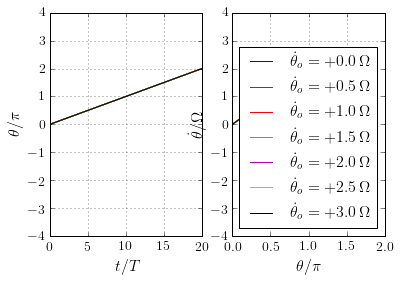

In [6]:
################################# time derivative of the state vector
def psidot1( psi, t ) :          # returns $\dot{\vec{\psi}}$
    return psi

fig = plt.figure()
ax1 = fig.add_subplot( 1, 2, 1 )  # for $\theta(t)$
ax2 = fig.add_subplot( 1, 2, 2 )  # for $\dot{\theta}(\theta)$

for i in np.linspace( 0, 3, 7 ) :
    label = r'$\dot{\theta}_o=%+.1f\,\Omega$'%(i)
    ax1.plot( [0,n],[0,2] )
    ax2.plot( [0,1],[0,2],  label=label )

# make it pretty
ax1.set_xlabel( r'$t/T$' )
ax1.set_ylabel( r'$\theta/\pi$' )
ax1.grid( 'on' )
ax1.set_xlim( 0, n )
ax1.set_ylim( -4, 4 )


ax2.set_xlabel( r'$\theta/\pi$' )
ax2.set_ylabel( r'$\dot{\theta}/\Omega$' )
ax2.grid( 'on' )
ax2.legend( loc=4 )
ax2.axis( [ 0, 2, -4, 4 ] )


### (b) Separatrix

Describe the motion for $\dot{\theta}_o<2\Omega$ and for $\dot{\theta}_o>2\Omega$. In particular, how do they differ? Refer explicitely to the phase space plot.

$E=mc^2$

### (c) Damped, Driven Pendulum


We now add two new forces, a sinusoidal driving torque, $N_\text{D} \sin(\omega t)$, and a frictional torque proportional to the angular velocity, $b\dot{\theta}$, giving the EoM:
$$
    m\ell^2 \ddot{\theta} 
    =
    -mg\ell \sin\theta 
    -b\dot{\theta}
    + N_\text{D} \cos(\omega t),
$$
or
$$
    \ddot{\theta} 
    =
    -\Omega^2 \sin\theta 
    -2\beta\dot{\theta}
    + f \cos(\omega t),
$$
where
\begin{align*}
    \Omega &\equiv \sqrt{g/\ell},
    \\
    \beta &\equiv b/2m\ell^2,
    \\
    f &\equiv N_\text{D}/m\ell^2,
\end{align*}
along with the driving frequency, $\omega$, each have units of angular frequency.

Assume the oscillator starts at rest at the equilibrium position and take the damping as $\beta=0.1\Omega$ and the driving strength as $f=0.5\Omega$.

Calculate and plot $\theta(t), 0\le t\le 20T$ for five values of the driving frequency $\omega$ between zero and $0.5\Omega$. On a separate plot graph the phase space plot, $\dot{\theta}(\theta)$.

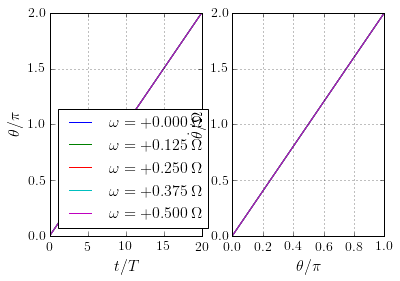

In [5]:
n = 20                     # number of periods
############################ calculated constants
beta = 0.01 * Omega
f = 2 * Omega
t = np.linspace( 0, n*T, n*N)
# start at equilibrium postion and at rest
psi0 = np.array( [0, 0] )

################################# time derivative of the state vector
def psidot2( psi, t ) :         # returns $\dot{\vec{\psi}}$
    return psi

fig = plt.figure()
ax1 = fig.add_subplot( 1, 2, 1 )
ax2 = fig.add_subplot( 1, 2, 2 )

for i in np.linspace( 0.0, 0.50, 5 ) :

    label = r'$\omega=%+.3f\,\Omega$'%(i)
    ax1.plot( [0,n],[0,2],  label=label )
    ax2.plot( [0,1],[0,2] )

# make it pretty
ax1.set_xlabel( r'$t/T$' )
ax1.set_ylabel( r'$\theta/\pi$' )
ax1.grid( 'on' )
ax1.legend( loc=3 )
ax1.set_xlim( 0, n )

ax2.set_xlabel( r'$\theta/\pi$' )
ax2.set_ylabel( r'$\dot{\theta}/\Omega$' )
ax2.grid( 'on' )


#### (d) Chaos

You should have found chaotic motion as the driving frequency approached the natural frequency of the system (i.e. $\omega \approx \Omega$).

Calculate, once again, $\theta(t)$ for driving frequencies $\omega\in\{0.6\Omega, 0.60001\Omega\}$ and plot the difference of the two angles as a function of time (i.e. $\Delta\theta\equiv\theta_2(t)-\theta_1(t)$ versus $t$) for $0\le t\le 1000T$.

You should observe a sensitivity to initial conditions that is a signature of chaos.

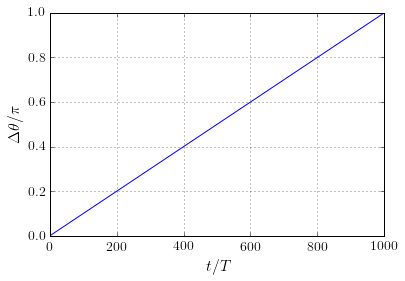

In [7]:
n = 1000                     # number of periods
t = np.linspace( 0, n*T, n*N)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot( [0,n],[0,1] )
ax.set_xlabel( '$t/T' )
ax.set_ylabel( r'$\Delta\theta/\pi$')